In [25]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from pprint import pprint
import pandas as pd 
from random import sample
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [26]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="f3a52efb14cf42a3840d1c04b283ca91",
                                               client_secret="fda334c722424e84989f5e95a2abf3d4",
                                               redirect_uri="http://localhost:8888/callback",
                                               scope="user-library-read"))

In [27]:
def getTracks(url):
    tracks = []
    response = sp.playlist_items(url,
                                    offset=0,
                                    fields='items.track.id,total',
                                    additional_types=['track'])
    if len(response['items']) == 0:
        return null 

    for item in response['items']:
        tracks.append(item['track']['id'])

    return tracks

In [56]:
playlists = {
    'pop': ["https://open.spotify.com/playlist/37i9dQZF1DX5gQonLbZD9s?si=30767127b8f94469", 
            "https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M?si=5a03addc2bc0459d"],
    'rock': ["https://open.spotify.com/playlist/37i9dQZF1DXcF6B6QPhFDv?si=b03e02334d354bf8", 
             "https://open.spotify.com/playlist/37i9dQZF1DWXRqgorJj26U?si=d10677ac57614cdf"],
    'classical': ["https://open.spotify.com/playlist/37i9dQZF1DWWEJlAGA9gs0?si=96c90b5d91994be8", 
                  "https://open.spotify.com/playlist/37i9dQZF1DWV0gynK7G6pD?si=b2513a07351040ea"],
    'country': ["https://open.spotify.com/playlist/37i9dQZF1DX1lVhptIYRda?si=598d4d9cae29480a", 
                "https://open.spotify.com/playlist/37i9dQZF1DWTkxQvqMy4WW?si=cfbffb74bcea4697"],
#     'jazz': ["https://open.spotify.com/playlist/37i9dQZF1DXbITWG1ZJKYt?si=eab23f856a494a22", 
#              "https://open.spotify.com/playlist/37i9dQZF1DXdwTUxmGKrdN?si=5aa84d1745fd4bc1"]
#     'metal': ["https://open.spotify.com/playlist/37i9dQZF1DWXNFSTtym834?si=3a9438df40e547a4", 
#               "https://open.spotify.com/playlist/37i9dQZF1DWWOaP4H0w5b0?si=415c0cace9fd40f1"]
#     "k-pop": ["https://open.spotify.com/playlist/37i9dQZF1DX14fiWYoe7Oh?si=82779124ede94fa0"]
    'blues': ["https://open.spotify.com/playlist/37i9dQZF1DXd9rSDyQguIk?si=4c914d3060274822", 
              "https://open.spotify.com/playlist/37i9dQZF1DWThcryaU9mXU?si=1c4b717a064644e3"]
}

In [57]:
tracks = {}
for genre in playlists: 
    for playlist in playlists[genre]: 
        if not genre in tracks: 
            tracks[genre] = getTracks(playlist)
        else: 
            tracks[genre].extend(getTracks(playlist))

In [59]:
# crop number of tracks 
lens = []
for genre in tracks:
    lens.append(len(tracks[genre]))

size = min(lens)

for genre in tracks: 
    tracks[genre] = sample(tracks[genre], size)

print(f"The number of tracks per category: {size}")
total = len(tracks["pop"]) + len(tracks["rock"]) + len(tracks["classical"]) + len(tracks["country"]) + len(tracks["blues"])
print(f"The number of tracks: {total}")

The number of tracks per category: 110
The number of tracks: 550


In [60]:
features = []

for genre in tracks:
    my_dict = []
    for x in range(0, size, 100):
        if x+100 < size: 
            my_dict.extend(sp.audio_features(tracks[genre][x:x+100]))
        else: 
            my_dict.extend(sp.audio_features(tracks[genre][x:size]))
    for d in my_dict: 
        d["genre"] = genre
    features.extend(my_dict)
len(features)

550

In [61]:
df = pd.DataFrame(features)
print(df.shape)
df.drop_duplicates(subset="id", inplace=True)
print(df.shape)

(550, 19)
(540, 19)


In [62]:
sizes = []
for genre in playlists:
    sizes.append(df[df["genre"] == genre].shape[0])


size = min(sizes)

#new_data = []
for genre in tracks: 
    print(df[df["genre"] == genre].shape[0])
    diff = df[df["genre"] == genre].shape[0] - size
    print(diff)
    drop_indices = np.random.choice(df[df["genre"] == genre].index, diff, replace=False)
    df.drop(drop_indices, inplace=True)

#df = pd.DataFrame(new_data)
print(f"The number of tracks per category: {size}")
print(f"The number of tracks: {df.shape[0]}")


105
0
109
4
110
5
109
4
107
2
The number of tracks per category: 105
The number of tracks: 525


In [63]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,0.768,0.678,2,-5.604,1,0.0505,0.00838,0.00000,0.0596,0.706,85.025,audio_features,29fRTIKsJhLUJoldM89GZS,spotify:track:29fRTIKsJhLUJoldM89GZS,https://api.spotify.com/v1/tracks/29fRTIKsJhLU...,https://api.spotify.com/v1/audio-analysis/29fR...,171387,4,pop
1,0.673,0.729,6,-4.879,1,0.0496,0.08300,0.00000,0.1000,0.675,122.023,audio_features,2Xy1UIVfOlukyye6Fd0wrI,spotify:track:2Xy1UIVfOlukyye6Fd0wrI,https://api.spotify.com/v1/tracks/2Xy1UIVfOluk...,https://api.spotify.com/v1/audio-analysis/2Xy1...,169672,4,pop
2,0.735,0.689,7,-5.410,0,0.0513,0.00381,0.00146,0.4090,0.710,116.940,audio_features,4NjTrZ2IQeWnIbzyY2SOfz,spotify:track:4NjTrZ2IQeWnIbzyY2SOfz,https://api.spotify.com/v1/tracks/4NjTrZ2IQeWn...,https://api.spotify.com/v1/audio-analysis/4NjT...,156168,4,pop
3,0.774,0.792,10,-4.021,1,0.0523,0.05100,0.00000,0.1550,0.507,122.062,audio_features,3eJH2nAjvNXdmPfBkALiPZ,spotify:track:3eJH2nAjvNXdmPfBkALiPZ,https://api.spotify.com/v1/tracks/3eJH2nAjvNXd...,https://api.spotify.com/v1/audio-analysis/3eJH...,139672,4,pop
4,0.829,0.512,6,-5.865,0,0.1870,0.49200,0.00000,0.1200,0.638,80.511,audio_features,4XvcHTUfIlWfyJTRG0aqlo,spotify:track:4XvcHTUfIlWfyJTRG0aqlo,https://api.spotify.com/v1/tracks/4XvcHTUfIlWf...,https://api.spotify.com/v1/audio-analysis/4Xvc...,123987,4,pop


In [64]:
df.drop(labels =["type", "id", "uri", "track_href", "analysis_url", "duration_ms", "time_signature"], inplace=True, axis=1)

In [65]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.768,0.678,2,-5.604,1,0.0505,0.00838,0.00000,0.0596,0.706,85.025,pop
1,0.673,0.729,6,-4.879,1,0.0496,0.08300,0.00000,0.1000,0.675,122.023,pop
2,0.735,0.689,7,-5.410,0,0.0513,0.00381,0.00146,0.4090,0.710,116.940,pop
3,0.774,0.792,10,-4.021,1,0.0523,0.05100,0.00000,0.1550,0.507,122.062,pop
4,0.829,0.512,6,-5.865,0,0.1870,0.49200,0.00000,0.1200,0.638,80.511,pop


## Feature Information 

Reference: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

* **danceability** *(float)* = Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* **energy** *(float)* = Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* **key** *(integer)* = The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. Between -1 and 11. 

* **loudness** *(float)* = The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

* **mode** *(integer)* = Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* **speechiness** *(float)* = Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* **acousticness** (float) = A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* **instrumentalness** *(float)* = Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
    
* **liveness** *(float)* = Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* **valence** *(float)* = A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* **tempo** (float) = The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

## Exploratary Data Analysis

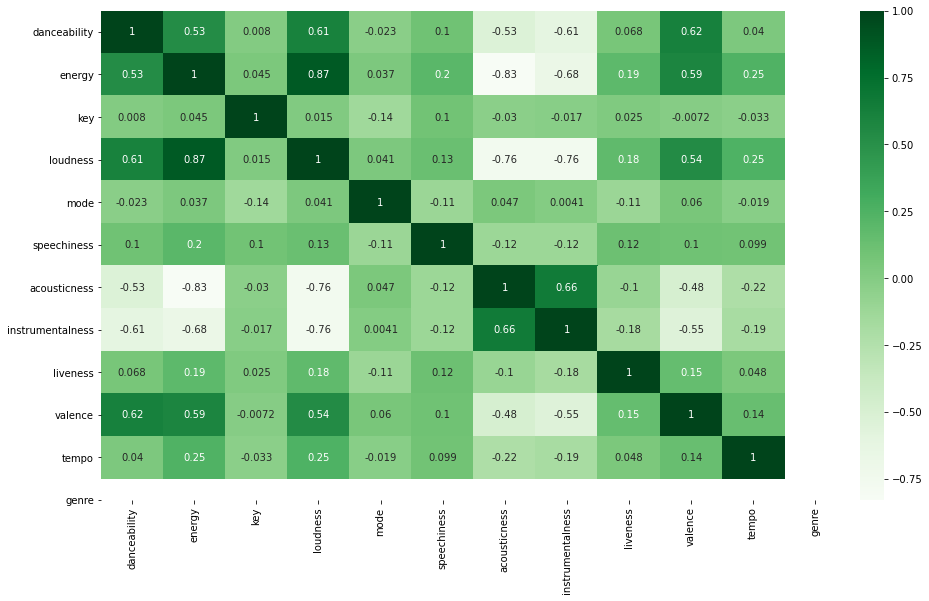

In [66]:
confusion_matr = df.corr()
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Greens", annot=True, 
            xticklabels = df.columns,
           yticklabels= df.columns);

## Pre-Process Data

In [67]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df['genre'])
y_true = df['genre']
y = le.transform(df["genre"])
Y = le.transform(df["genre"])
X = df.iloc[:, 0:11] 

scaled = preprocessing.MinMaxScaler().fit_transform(X)
X = pd.DataFrame(scaled, columns = X.columns)

## Split into Training and Testing 

In [68]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y)
print(f"The size of training data is: {train_x.size}")
print(f"The size of testing data is: {test_x.size}")

The size of training data is: 4323
The size of testing data is: 1452


## Try Machine Learning Algorithms

In [69]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=6, shuffle=True, random_state=10)

In [70]:
from sklearn.model_selection import GridSearchCV

def hyperparameter_search(parameters, classifier, train_x, train_y):
    grid = GridSearchCV(estimator=classifier, param_grid=parameters, cv=kfold, scoring='accuracy')
    grid.fit(train_x, train_y)
    return grid

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
hp = [{'n_neighbors': [2, 3, 4, 6, 8, 10, 15, 30, 35]}]

knn = hyperparameter_search(hp, KNeighborsClassifier(), train_x, train_y)
print(knn.best_score_)
print(knn.best_estimator_)
print(knn.best_params_)

0.6237762237762238
KNeighborsClassifier(n_neighbors=3)
{'n_neighbors': 3}


In [72]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

hp = [{'max_depth': [None, 5, 10, 15, 20]}]
dt = hyperparameter_search(hp, DecisionTreeClassifier(), train_x, train_y)

print(dt.best_score_)
print(dt.best_estimator_)
print(dt.best_params_)

0.6743978243978245
DecisionTreeClassifier(max_depth=5)
{'max_depth': 5}


In [73]:
from sklearn.ensemble import RandomForestClassifier

hp = [{'n_estimators': [10,100, 200, 1000, 1500, 2000], 'max_depth': [None], 'random_state': [0]}]
rfc = hyperparameter_search(hp, RandomForestClassifier(), train_x, train_y)

print(rfc.best_score_)
print(rfc.best_estimator_)
print(rfc.best_params_)

0.7455710955710956
RandomForestClassifier(n_estimators=1500, random_state=0)
{'max_depth': None, 'n_estimators': 1500, 'random_state': 0}


In [76]:
from sklearn.svm import SVC

hp = [{'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'decision_function_shape': ['ovo']}]
svc = hyperparameter_search(hp, SVC(), train_x, train_y)

print(svc.best_score_)
print(svc.best_estimator_)
print(svc.best_params_)

0.7354700854700855
SVC(decision_function_shape='ovo', kernel='poly')
{'decision_function_shape': 'ovo', 'kernel': 'poly'}


In [77]:
from sklearn.linear_model import LogisticRegression

hp = [{'solver' : ['liblinear']}]
logreg = hyperparameter_search(hp, LogisticRegression(), train_x, train_y)

print(logreg.best_score_)
print(logreg.best_estimator_)
print(logreg.best_params_)

0.6361693861693861
LogisticRegression(solver='liblinear')
{'solver': 'liblinear'}


In [79]:
from sklearn.neural_network import MLPClassifier

hp = [{'alpha' : [1e-8, 1e-9], 'random_state': [1], 'hidden_layer_sizes': [(400,5), (500,10)], 'max_iter': [10000]}]
nn = hyperparameter_search(hp, MLPClassifier(), train_x, train_y)

print(nn.best_score_)
print(nn.best_estimator_)
print(nn.best_params_)

0.7405594405594406
MLPClassifier(alpha=1e-09, hidden_layer_sizes=(500, 10), max_iter=10000,
              random_state=1)
{'alpha': 1e-09, 'hidden_layer_sizes': (500, 10), 'max_iter': 10000, 'random_state': 1}


## ANALYSIS

In [80]:
preds = rfc.predict(test_x)
test_acc = len(preds[preds == test_y]) / len(preds)
print(test_acc)

0.7272727272727273


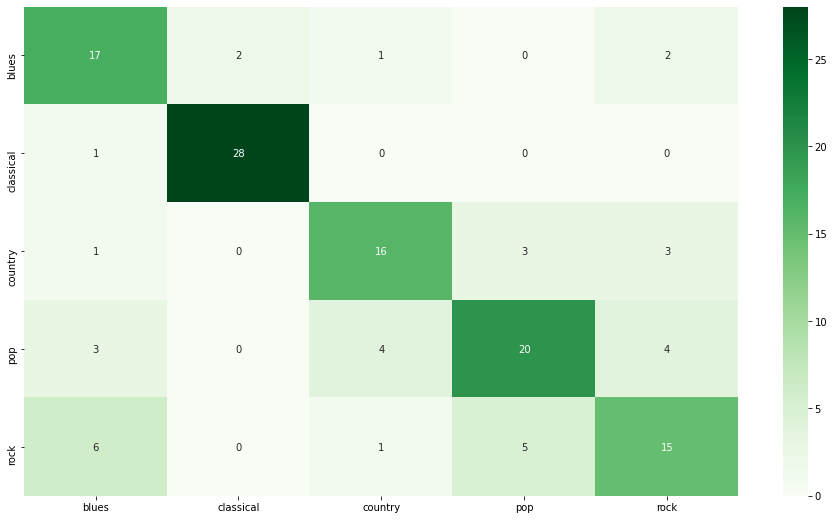

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
preds = rfc.predict(test_x)
confusion_matr = confusion_matrix(le.inverse_transform(test_y), le.inverse_transform(preds))
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Greens", annot=True, 
            xticklabels = le.classes_,
           yticklabels= le.classes_);

In [81]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=rfc, random_state=1)
perm.fit(test_x, test_y)

eli5.show_weights(estimator=perm, feature_names = test_x.columns.tolist())

Weight,Feature
0.1015 ± 0.0688,loudness
0.0788 ± 0.0366,instrumentalness
0.0621 ± 0.0201,danceability
0.0561 ± 0.0353,speechiness
0.0515 ± 0.0726,acousticness
0.0258 ± 0.0281,energy
0.0136 ± 0.0278,tempo
0.0091 ± 0.0261,valence
-0.0061 ± 0.0223,liveness
-0.0091 ± 0.0148,key


## UNSUPERVISED LEARNING

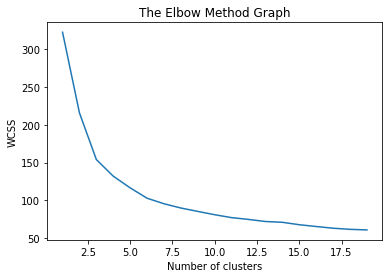

In [82]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,20): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(train_x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [83]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit_predict(X)
kmeans

array([4, 1, 2, 1, 2, 4, 4, 2, 2, 2, 2, 2, 2, 1, 1, 4, 2, 1, 1, 2, 1, 2,
       2, 1, 1, 4, 1, 2, 2, 4, 4, 2, 4, 4, 1, 2, 1, 4, 2, 2, 2, 4, 4, 1,
       2, 1, 2, 2, 2, 1, 4, 2, 1, 4, 2, 1, 2, 4, 4, 1, 4, 1, 4, 2, 1, 2,
       1, 1, 4, 4, 2, 4, 4, 2, 2, 1, 2, 4, 4, 1, 1, 4, 4, 2, 2, 2, 1, 2,
       2, 1, 2, 4, 2, 4, 1, 1, 1, 1, 2, 1, 2, 2, 4, 2, 4, 2, 1, 1, 2, 4,
       4, 4, 1, 1, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 2, 4, 2, 2, 1, 1, 1,
       1, 2, 1, 2, 4, 4, 1, 1, 4, 2, 1, 4, 2, 2, 4, 2, 4, 1, 4, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4,
       1, 2, 2, 4, 1, 2, 4, 4, 1, 4, 2, 4, 4, 2, 1, 4, 4, 2, 1, 2, 2, 1,
       4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3,
       0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3,
       0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 4, 0,
       3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

[[0.030303030303030304, 0.9696969696969697, 0.0, 0.0, 0.0], [0.18253968253968253, 0.0, 0.35714285714285715, 0.25396825396825395, 0.20634920634920634], [0.3, 0.0, 0.075, 0.35833333333333334, 0.26666666666666666], [0.05263157894736842, 0.9473684210526315, 0.0, 0.0, 0.0], [0.2411764705882353, 0.0058823529411764705, 0.3, 0.17647058823529413, 0.27647058823529413]]


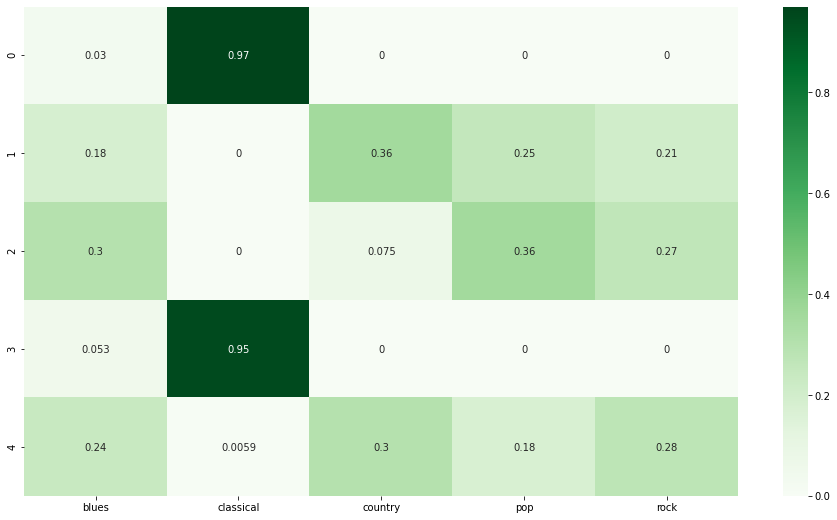

In [84]:
c_matrix = []
for x in range(5):
    true_label = Y[kmeans == x]
    arr = []
    for y in range(5):
        correct_label = true_label[np.where(true_label == y)]
        arr.append(len(correct_label)/len(true_label))
    c_matrix.append(arr)

print(c_matrix)
plt.figure(figsize = (16, 9))
sns.heatmap(c_matrix, cmap="Greens", annot=True, 
            xticklabels = le.classes_,
           yticklabels= [y for y in range(5)]);